# Modern monetary/Keynesian approach

## real interest rate parity model

multistep: mutistpe forecast  
m: quarterly data

### dependent variable

- "DEXJPUS","fred"

### independent variable

- "MANMM101USM189S","fred"
- "MANMM101JPM189S","fred"
- "GDP","fred"
- "JPNNGDP","fred"
- "MKTGDPJPA646NWDB","fred"
- "USD12MD156N","fred"
- "JPY12MD156N","fred"
- "PPIACO","fred"
- "PITGCG01JPM661N","fred"

In [1]:
%matplotlib inline
import datetime
import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VECM
start="1986/1/1";end='2019/12/31'
start1="1985/1/1";end1='2019/12/31'
from dateutil.relativedelta import relativedelta
from scipy.stats import t
from scipy.stats import norm
def tcdf(x,n): #t-distribution
    if x>=0:
        y=(1-t.cdf(x,n))
    else:
        y=t.cdf(x,n)
    return y
def ncdf(x): #t-distribution
    if x>=0:
        y=(1-norm.cdf(x))
    else:
        y=norm.cdf(x)
    return y

In [2]:
e =web.DataReader("DEXJPUS","fred",start,end)
m1 =web.DataReader("MANMM101USM189S","fred",start,end)/1000000000#w
m2 =web.DataReader("MANMM101JPM189S","fred",start,end)/1000000000#w
y1 =web.DataReader("GDP","fred",start,end)# norminal q
y2 =web.DataReader("JPNNGDP","fred",start,end)#nominal q
y3=web.DataReader("MKTGDPJPA646NWDB","fred",start,end)#q
r1 =web.DataReader("USD12MD156N","fred",start,end)#q
r2 =web.DataReader("JPY12MD156N","fred",start,end)#q
p3 =web.DataReader("PPIACO","fred",start1,end)#m
p4 =web.DataReader("PITGCG01JPM661N","fred",start1,end)#m
#y1 =web.DataReader("GDPC1","fred",start,end)# real q
#y2 =web.DataReader("JPNRGDPEXP","fred",start,end)# real

In [3]:
FRQ=['QS-JAN']
interval=3
for i in range(len(FRQ)):
    ee=e.copy().resample(FRQ[i]).last()
    ee.columns=['x']
    mm1=m1.copy().resample(FRQ[i]).last()
    mm1.columns=['x']
    mm2=m2.copy().resample(FRQ[i]).last()
    mm2.columns=['x']
    yy1=y1.copy().resample(FRQ[i]).last()
    yy1.columns=['x']
    yy2=y2.copy().resample(FRQ[i]).last()
    yy2.columns=['x']
    rr1=r1.copy().resample(FRQ[i]).last()
    rr1.columns=['x']
    rr2=r2.copy().resample(FRQ[i]).last()
    rr2.columns=['x']
    pp1=(p3.copy().pct_change().rolling(12).mean().dropna()).resample(FRQ[i]).last()
    pp1.columns=['x']
    pp2=(p4.copy().pct_change().rolling(12).mean().dropna()).resample(FRQ[i]).last()
    pp2.columns=['x']
    tsd=pd.concat([ee,mm1,mm2,yy1,yy2,rr1,rr2,pp1,pp2,rr1/100-pp1,rr2/100-pp2],axis=1)
    tsd.columns=['ee','m1','m2','y1','y2','r1','r2','p1','p2','rp1','rp2']
    #tsd=tsd.fillna(0)
    idx=e.index[-1]-relativedelta(months=2)
    tsd=tsd.copy().loc[:idx]
    print(i,FRQ[i],tsd.tail(5))
    if i==0:
        tsd1=tsd
    elif i==1:
        tsd2=tsd
    else:
        tsd3=tsd

0 QS-JAN                 ee      m1        m2         y1        y2       r1       r2  \
DATE                                                                          
2018-10-01  109.70  3746.5  772898.2  20897.804  546737.7  3.00544  0.10633   
2019-01-01  110.68  3730.0  783525.1  21098.827  552687.8  2.71063  0.09250   
2019-04-01  107.84  3832.9  793923.2  21340.267  555954.0  2.17813  0.04567   
2019-07-01  108.11  3903.3  804952.1  21542.540  558237.1  2.03213  0.02550   
2019-10-01  108.67  3978.4  817294.3  21729.124  549920.9  1.99625  0.10483   

                  p1        p2       rp1       rp2  
DATE                                                
2018-10-01  0.001996 -0.001016  0.028058  0.002079  
2019-01-01  0.000651 -0.000329  0.026455  0.001254  
2019-04-01 -0.001588 -0.001102  0.023369  0.001559  
2019-07-01 -0.002134 -0.001708  0.022456  0.001963  
2019-10-01 -0.000736 -0.000939  0.020698  0.001987  


In [4]:
y4=y3.resample('QS').asfreq()
y4=y4.interpolate()/1000000000
y5=pd.concat([tsd1.ee,y4,y2],axis=1)
y5.columns=['e','y4','y2']
y5.iloc[:,1]=y5.y4*y5.e
y6=(y5.y4.rolling(window=8).mean()).shift(-6)
y6=y6.bfill()
l=len(y5.loc['1994':])
y6.iloc[l:]=y5.iloc[l:,2].values
tsd1=pd.concat([ee,mm1,mm2,yy1,y6,rr1,rr2,pp1,pp2,rr1/100-pp1,rr2/100-pp2],axis=1)
tsd1.columns=['ee','m1','m2','y1','y2','r1','r2','p1','p2','rp1','rp2']
tsd=tsd1

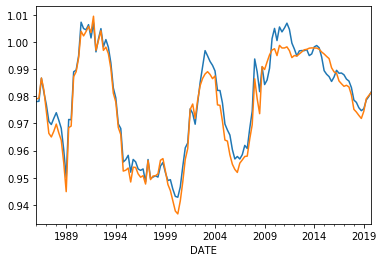

In [5]:
((1+tsd.rp2)/(1+tsd.rp1)).plot()
((1+tsd.r2/100)/(1+tsd.r1/100)).plot()
#((1+tsd.r2/100-tsd.p2/10)/(1+tsd.r1/100-tsd.p1/10)).plot()

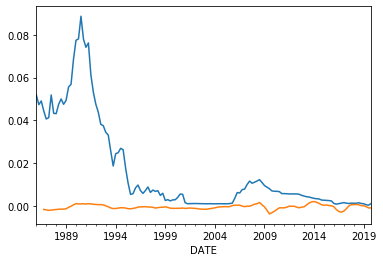

In [6]:
#((1+tsd.rp2)/(1+tsd.rp1)).plot()
(tsd.r2/100).plot()
tsd.p2.rolling(4).mean().plot()

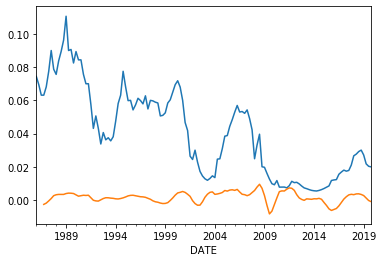

In [7]:
#((1+tsd.rp2)/(1+tsd.rp1)).plot()
(tsd.r1/100).plot()
tsd.p1.rolling(4).mean().plot()

In [8]:
def backtest_ols_dp(tsd,tw,pt):#tw time window pt:predicting time
    pred=[]
    real0=[]
    real9=[]
    tsd0=np.log(tsd.iloc[:,:6]).copy()
    for i in range(tw+1,len(tsd)+1-1):
        yy=tsd0.iloc[i-tw:i:1,0]
        y0=tsd0.iloc[i-tw-1:i:1,0].diff().dropna()
        x0=(tsd0.iloc[i-tw-1:i:1,1]-tsd0.iloc[i-tw-1:i:1,2]).diff().dropna()
        x00=(tsd0.iloc[i-tw-1:i:1,3]-tsd0.iloc[i-tw-1:i:1,4]).diff().dropna()
        x000=((1+tsd.iloc[i-tw-1:i:1,10])/(1+tsd.iloc[i-tw-1:i:1,9])).diff().dropna()
        x0000=((1+tsd.iloc[i-tw-1:i:1,8])/(1+tsd.iloc[i-tw-1:i:1,7])).diff().dropna()
        x0=pd.concat([x0,x00,x000,x0000],axis=1)
        x0=sm.add_constant(x0.values)
        res= sm.OLS(y0, x0).fit()
        real0.append(np.exp(tsd0.iloc[i-1:i,0][-1]))
        if i<len(tsd)+1-pt:
            x9=(tsd0.iloc[i-1:i+pt:1,1]-tsd0.iloc[i-1:i+pt:1,2]).diff().dropna()
            x99=(tsd0.iloc[i-1:i+pt:1,3]-tsd0.iloc[i-1:i+pt:1,4]).diff().dropna()
            x999=((1+tsd.iloc[i-1:i+pt:1,10])/(1+tsd.iloc[i-1:i+pt:1,9])).diff().dropna()
            x9999=((1+tsd.iloc[i-1:i+pt:1,8])/(1+tsd.iloc[i-1:i+pt:1,7])).diff().dropna()
            x9=pd.concat([x9,x99,x999,x9999],axis=1)
            if pt==1:
                x9=np.insert(x9.values,0,1)
            else:
                x9=sm.add_constant(x9.values)
            pred0=res.predict(x9)[-1:]
            pred.append(np.exp(pred0+yy.iloc[-1]))
            real9.append(np.exp(tsd0.iloc[i+pt-1:i+pt:1,0].values))
    return real0,real9,pred

def performance_eval(real0,real9,pred):
    p0=pd.DataFrame(real0)
    p9=pd.DataFrame(real9)
    pp=pd.DataFrame(pred)
    p0_=p0[:len(p9)]
    pp_=pp[:len(p9)]
    wrs=p0_[(p9<p0_)&(pp_<p0_)].count()
    wrl=p0_[(p9>p0_)&(pp_>p0_)].count()
    wr=float((wrs+wrl)/p0_.count())
    #wrp=tcdf(float((wr-0.5)/np.sqrt(0.25/p0_.count())),p0_.count())[0]
    wrp=ncdf(float((wr-0.5)/np.sqrt(0.25/p0_.count())))
    d_x=(pp_-p9)**2
    d_rw=(p9-p0_)**2
    d=d_x-d_rw
    d_=float(d.mean())
    #dm=tcdf(float(d_/np.sqrt(((d-d_)**2).sum()/len(d)**2)),p0_.count())[0]
    dm=ncdf(float(d_/np.sqrt(((d-d_)**2).sum()/len(d)**2)))
    rmse=float(d_x.mean()/d_rw.mean())
    return rmse,dm,wr,wrp

def performance_report(real0,real9,pred):
    ab,dm,wr,wrp=performance_eval(real0,real9,pred)
    print('{0:20s}{1:5d} mse_r {2:7.4f} mse_p {3:7.2f} wr {4:7.4f} wrp {5:7.2f} len {6:4d}'
          .format(model,isp,ab,dm,wr,wrp,len(real9)))    

In [9]:
model='OLS'
oosp=1
pstart=datetime.date(1991,1,1)
pend=datetime.date(1994,12,31)        
nn=len(tsd.loc[pstart:pend])
for isp in range(oosp*10,oosp*50,3):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    10 mse_r  4.2533 mse_p    0.13 wr  0.7143 wrp    0.05 len   14
OLS                    13 mse_r  2.8203 mse_p    0.12 wr  0.5000 wrp    0.50 len   14
OLS                    16 mse_r  2.4270 mse_p    0.15 wr  0.5000 wrp    0.50 len   14
OLS                    19 mse_r  2.6322 mse_p    0.17 wr  0.5000 wrp    0.50 len   14


In [10]:
model='OLS'
oosp=1
pstart=datetime.date(1995,1,1)
pend=datetime.date(2007,12,31)        
nn=len(tsd.loc[pstart:pend])
for isp in range(oosp*10,oosp*50,3):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    10 mse_r  2.3967 mse_p    0.01 wr  0.6000 wrp    0.08 len   50
OLS                    13 mse_r  1.9847 mse_p    0.03 wr  0.5800 wrp    0.13 len   50
OLS                    16 mse_r  1.2867 mse_p    0.16 wr  0.5800 wrp    0.13 len   50
OLS                    19 mse_r  0.9205 mse_p    0.37 wr  0.6200 wrp    0.04 len   50
OLS                    22 mse_r  0.8748 mse_p    0.28 wr  0.6000 wrp    0.08 len   50
OLS                    25 mse_r  0.9098 mse_p    0.34 wr  0.6200 wrp    0.04 len   50
OLS                    28 mse_r  0.9183 mse_p    0.35 wr  0.6400 wrp    0.02 len   50
OLS                    31 mse_r  0.9103 mse_p    0.32 wr  0.7200 wrp    0.00 len   50
OLS                    34 mse_r  0.9135 mse_p    0.31 wr  0.7000 wrp    0.00 len   50
OLS                    37 mse_r  0.9004 mse_p    0.29 wr  0.6800 wrp    0.01 len   50


In [11]:
model='OLS'
oosp=1
pstart=datetime.date(2008,1,1)
pend=datetime.date(2020,12,31)        
nn=len(tsd.loc[pstart:pend])
for isp in range(oosp*10,oosp*50,3):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    10 mse_r  1.6527 mse_p    0.02 wr  0.6087 wrp    0.07 len   46
OLS                    13 mse_r  1.6022 mse_p    0.04 wr  0.5870 wrp    0.12 len   46
OLS                    16 mse_r  1.2450 mse_p    0.14 wr  0.6087 wrp    0.07 len   46
OLS                    19 mse_r  1.1377 mse_p    0.29 wr  0.6304 wrp    0.04 len   46
OLS                    22 mse_r  1.0740 mse_p    0.36 wr  0.6522 wrp    0.02 len   46
OLS                    25 mse_r  1.1457 mse_p    0.28 wr  0.6304 wrp    0.04 len   46
OLS                    28 mse_r  1.2962 mse_p    0.07 wr  0.6304 wrp    0.04 len   46
OLS                    31 mse_r  1.3257 mse_p    0.05 wr  0.6087 wrp    0.07 len   46
OLS                    34 mse_r  1.2719 mse_p    0.08 wr  0.5870 wrp    0.12 len   46
OLS                    37 mse_r  1.3733 mse_p    0.04 wr  0.5870 wrp    0.12 len   46
OLS                    40 mse_r  1.3025 mse_p    0.05 wr  0.5870 wrp    0.12 len   46
OLS                    43 mse_r  1.2828 mse_p    0.07 

In [12]:
model='OLS'
oosp=4
pstart=datetime.date(1991,1,1)
pend=datetime.date(1994,12,31)       
nn=len(tsd.loc[pstart:pend])
for isp in range(oosp*3,oosp*50,3):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    12 mse_r  1.1853 mse_p    0.28 wr  0.8182 wrp    0.02 len   11
OLS                    15 mse_r  1.0337 mse_p    0.44 wr  0.6364 wrp    0.18 len   11
OLS                    18 mse_r  1.0098 mse_p    0.49 wr  0.6364 wrp    0.18 len   11
OLS                    21 mse_r  0.7131 mse_p    0.08 wr  0.9091 wrp    0.00 len   11


In [13]:
model='OLS'
oosp=4
pstart=datetime.date(1995,1,1)
pend=datetime.date(2007,12,31)       
nn=len(tsd.loc[pstart:pend])
for isp in range(oosp*3,oosp*50,6):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    12 mse_r  2.4233 mse_p    0.05 wr  0.5319 wrp    0.33 len   47
OLS                    18 mse_r  0.9417 mse_p    0.32 wr  0.6170 wrp    0.05 len   47
OLS                    24 mse_r  0.9910 mse_p    0.47 wr  0.5957 wrp    0.09 len   47
OLS                    30 mse_r  1.0244 mse_p    0.41 wr  0.5745 wrp    0.15 len   47
OLS                    36 mse_r  0.8810 mse_p    0.11 wr  0.5745 wrp    0.15 len   47


In [14]:
model='OLS'
oosp=4
pstart=datetime.date(2008,1,1)
pend=datetime.date(2020,12,31)       
nn=len(tsd.loc[pstart:pend])
for isp in range(oosp*3,oosp*50,6):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    12 mse_r  1.2329 mse_p    0.11 wr  0.5349 wrp    0.32 len   43
OLS                    18 mse_r  0.9684 mse_p    0.36 wr  0.5349 wrp    0.32 len   43
OLS                    24 mse_r  1.0139 mse_p    0.45 wr  0.6047 wrp    0.08 len   43
OLS                    30 mse_r  1.0489 mse_p    0.32 wr  0.5349 wrp    0.32 len   43
OLS                    36 mse_r  1.0610 mse_p    0.24 wr  0.5349 wrp    0.32 len   43
OLS                    42 mse_r  1.0327 mse_p    0.33 wr  0.5349 wrp    0.32 len   43
OLS                    48 mse_r  0.9925 mse_p    0.46 wr  0.5581 wrp    0.22 len   43
OLS                    54 mse_r  0.9727 mse_p    0.35 wr  0.5814 wrp    0.14 len   43
OLS                    60 mse_r  0.9538 mse_p    0.25 wr  0.5814 wrp    0.14 len   43
OLS                    66 mse_r  0.9053 mse_p    0.09 wr  0.6279 wrp    0.05 len   43
OLS                    72 mse_r  0.8943 mse_p    0.06 wr  0.5581 wrp    0.22 len   43
OLS                    78 mse_r  0.9149 mse_p    0.11 

In [15]:
model='OLS'
oosp=20
pstart=datetime.date(1995,1,1)
pend=datetime.date(2007,12,31)   
nn=len(tsd.loc[pstart:pend])        
for isp in range(12,oosp*10,2):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    12 mse_r  2.1854 mse_p    0.00 wr  0.5161 wrp    0.43 len   31
OLS                    14 mse_r  1.6419 mse_p    0.00 wr  0.5161 wrp    0.43 len   31
OLS                    16 mse_r  1.2932 mse_p    0.06 wr  0.4839 wrp    0.43 len   31
OLS                    18 mse_r  1.1048 mse_p    0.26 wr  0.5484 wrp    0.30 len   31
OLS                    20 mse_r  1.2263 mse_p    0.07 wr  0.4516 wrp    0.30 len   31
OLS                    22 mse_r  1.2098 mse_p    0.10 wr  0.4516 wrp    0.30 len   31
OLS                    24 mse_r  1.2242 mse_p    0.09 wr  0.4516 wrp    0.30 len   31
OLS                    26 mse_r  1.1097 mse_p    0.23 wr  0.4839 wrp    0.43 len   31
OLS                    28 mse_r  0.9533 mse_p    0.37 wr  0.6129 wrp    0.10 len   31
OLS                    30 mse_r  0.8867 mse_p    0.19 wr  0.6129 wrp    0.10 len   31
OLS                    32 mse_r  0.8507 mse_p    0.11 wr  0.5806 wrp    0.18 len   31
OLS                    34 mse_r  0.8688 mse_p    0.14 

In [16]:
model='OLS'
oosp=20
pstart=datetime.date(2008,1,1)
pend=datetime.date(2020,12,31)   
nn=len(tsd.loc[pstart:pend])        
for isp in range(15,oosp*10,12):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_ols_dp(tsdd,isp,oosp)
        performance_report(real0,real9,pred)

OLS                    15 mse_r  0.8863 mse_p    0.00 wr  0.7407 wrp    0.01 len   27
OLS                    27 mse_r  0.9216 mse_p    0.00 wr  0.6667 wrp    0.04 len   27
OLS                    39 mse_r  0.9512 mse_p    0.01 wr  0.7037 wrp    0.02 len   27
OLS                    51 mse_r  0.9417 mse_p    0.02 wr  0.7037 wrp    0.02 len   27
OLS                    63 mse_r  0.9297 mse_p    0.01 wr  0.6667 wrp    0.04 len   27
OLS                    75 mse_r  0.9568 mse_p    0.04 wr  0.6296 wrp    0.09 len   27
OLS                    87 mse_r  0.9719 mse_p    0.09 wr  0.6296 wrp    0.09 len   27


In [17]:
def backtest_VECM(tsd,tw,pt,det):#tw time window pt:predicting time
    pred=[]
    real0=[]
    real9=[]
    tsd0=np.log(tsd.iloc[:,:6]).copy()    
    for i in range(tw,len(tsd)+1):
        y0=(tsd0.iloc[i-tw:i:1,0])
        x=tsd0.iloc[i-tw:i:1,1]-tsd0.iloc[i-tw:i:1,2]
        xx=tsd0.iloc[i-tw:i:1,3]-tsd0.iloc[i-tw:i:1,4]
        xxx=(1+tsd.iloc[i-tw:i:1,10]/100)/(1+tsd.iloc[i-tw:i:1,9]/100)
        xxxx=(1+tsd.iloc[i-tw:i:1,8])/(1+tsd.iloc[i-tw:i:1,7])
        tsd00=pd.concat([y0,x,xx,xxx],axis=1)
        model = VECM(tsd00,k_ar_diff=0,coint_rank=1,deterministic=det)
        results = model.fit() 
        real0.append(np.exp(y0.iloc[-1]))
        pp=np.exp(results.predict(pt)[-1][0])
        pred.append(pp)
        if i<len(tsd)+1-pt:
            real9.append(tsd.iloc[i+pt-1,0])
    return real0,real9,pred

In [18]:
model='VECM'
oosp=1
pstart=datetime.date(1991,1,1)
pend=datetime.date(1994,12,31)   
nn=len(tsd.loc[pstart:pend])    
for f in range(len(FRQ)):
    for isp in range(oosp*10,oosp*200,oosp*1):#10,pt):
        ps=pstart-relativedelta(months=isp*interval-1)
        tsdd=tsd.loc[ps:pend]
        if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
            real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'li')
            performance_report(real0,real9,pred)

VECM                   10 mse_r  1.2835 mse_p    0.12 wr  0.4000 wrp    0.22 len   15
VECM                   11 mse_r  1.4594 mse_p    0.07 wr  0.4000 wrp    0.22 len   15
VECM                   12 mse_r  1.2400 mse_p    0.25 wr  0.5333 wrp    0.40 len   15
VECM                   13 mse_r  0.9175 mse_p    0.37 wr  0.6000 wrp    0.22 len   15
VECM                   14 mse_r  1.2238 mse_p    0.25 wr  0.5333 wrp    0.40 len   15
VECM                   15 mse_r  1.0309 mse_p    0.45 wr  0.5333 wrp    0.40 len   15
VECM                   16 mse_r  1.1938 mse_p    0.30 wr  0.5333 wrp    0.40 len   15
VECM                   17 mse_r  1.0282 mse_p    0.47 wr  0.4667 wrp    0.40 len   15
VECM                   18 mse_r  0.8884 mse_p    0.36 wr  0.6000 wrp    0.22 len   15
VECM                   19 mse_r  1.0889 mse_p    0.39 wr  0.5333 wrp    0.40 len   15
VECM                   20 mse_r  1.0996 mse_p    0.38 wr  0.4667 wrp    0.40 len   15
VECM                   21 mse_r  1.0188 mse_p    0.47 

In [19]:
model='VECM'
oosp=1
pstart=datetime.date(1995,1,1)
pend=datetime.date(2007,12,31)   
nn=len(tsd.loc[pstart:pend])    
for isp in range(oosp*18,oosp*200,oosp*2):#10,pt):
    ps=pstart-relativedelta(months=isp*interval-1)
    tsdd=tsd.loc[ps:pend]
    if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
        real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'ci')
        performance_report(real0,real9,pred)

VECM                   18 mse_r  1.0301 mse_p    0.25 wr  0.6471 wrp    0.02 len   51
VECM                   20 mse_r  1.0202 mse_p    0.34 wr  0.5686 wrp    0.16 len   51
VECM                   22 mse_r  1.0284 mse_p    0.32 wr  0.5882 wrp    0.10 len   51
VECM                   24 mse_r  1.0907 mse_p    0.12 wr  0.5686 wrp    0.16 len   51
VECM                   26 mse_r  1.0633 mse_p    0.18 wr  0.5686 wrp    0.16 len   51
VECM                   28 mse_r  1.0974 mse_p    0.08 wr  0.5098 wrp    0.44 len   51
VECM                   30 mse_r  1.1219 mse_p    0.04 wr  0.4706 wrp    0.34 len   51
VECM                   32 mse_r  1.1528 mse_p    0.02 wr  0.4510 wrp    0.24 len   51
VECM                   34 mse_r  1.1345 mse_p    0.01 wr  0.3922 wrp    0.06 len   51
VECM                   36 mse_r  1.0695 mse_p    0.07 wr  0.4314 wrp    0.16 len   51


In [20]:
model='VECM'
oosp=1
pstart=datetime.date(2008,1,1)
pend=datetime.date(2020,12,31)   
nn=len(tsd.loc[pstart:pend])    
for f in range(len(FRQ)):
    for isp in range(oosp*12,oosp*200,oosp*12):#10,pt):
        ps=pstart-relativedelta(months=isp*interval-1)
        tsdd=tsd.loc[ps:pend]
        if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
            real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'ci')
            performance_report(real0,real9,pred)

VECM                   12 mse_r  1.9126 mse_p    0.02 wr  0.3191 wrp    0.01 len   47
VECM                   24 mse_r  1.1403 mse_p    0.06 wr  0.5319 wrp    0.33 len   47
VECM                   36 mse_r  1.0362 mse_p    0.09 wr  0.5532 wrp    0.23 len   47
VECM                   48 mse_r  1.0218 mse_p    0.13 wr  0.5106 wrp    0.44 len   47
VECM                   60 mse_r  1.0209 mse_p    0.06 wr  0.5106 wrp    0.44 len   47
VECM                   72 mse_r  1.0007 mse_p    0.45 wr  0.5745 wrp    0.15 len   47
VECM                   84 mse_r  1.0274 mse_p    0.01 wr  0.4255 wrp    0.15 len   47


In [21]:
model='VECM'
oosp=4
pstart=datetime.date(1991,1,1)
pend=datetime.date(1995,12,31)   
nn=len(tsd.loc[pstart:pend])    
for f in range(len(FRQ)):
    for isp in range(oosp*2,oosp*200,oosp*1):#10,pt):
        ps=pstart-relativedelta(months=isp*interval-1)
        tsdd=tsd.loc[ps:pend]
        if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
            real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'ci')
            performance_report(real0,real9,pred)

VECM                    8 mse_r  1.8986 mse_p    0.04 wr  0.4375 wrp    0.31 len   16
VECM                   12 mse_r  0.8769 mse_p    0.27 wr  0.8125 wrp    0.01 len   16
VECM                   16 mse_r  0.7759 mse_p    0.09 wr  0.6875 wrp    0.07 len   16
VECM                   20 mse_r  0.7357 mse_p    0.06 wr  0.6250 wrp    0.16 len   16


In [22]:
model='VECM'
oosp=4
pstart=datetime.date(1995,1,1)
pend=datetime.date(2007,12,31)   
nn=len(tsd.loc[pstart:pend])    
for f in range(len(FRQ)):
    for isp in range(oosp*2,oosp*200,oosp*1):#10,pt):
        ps=pstart-relativedelta(months=isp*interval-1)
        tsdd=tsd.loc[ps:pend]
        if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
            real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'ci')
            performance_report(real0,real9,pred)

VECM                    8 mse_r  1.3554 mse_p    0.05 wr  0.5000 wrp    0.50 len   48
VECM                   12 mse_r  1.9021 mse_p    0.03 wr  0.5208 wrp    0.39 len   48
VECM                   16 mse_r  1.2908 mse_p    0.09 wr  0.4583 wrp    0.28 len   48
VECM                   20 mse_r  1.0967 mse_p    0.22 wr  0.5625 wrp    0.19 len   48
VECM                   24 mse_r  1.2434 mse_p    0.04 wr  0.5417 wrp    0.28 len   48
VECM                   28 mse_r  1.4584 mse_p    0.00 wr  0.3750 wrp    0.04 len   48
VECM                   32 mse_r  1.6901 mse_p    0.00 wr  0.2708 wrp    0.00 len   48
VECM                   36 mse_r  1.3087 mse_p    0.00 wr  0.3333 wrp    0.01 len   48


In [23]:
model='VECM'
oosp=4
pstart=datetime.date(2008,1,1)
pend=datetime.date(2020,12,31)   
nn=len(tsd.loc[pstart:pend])    
for f in range(len(FRQ)):
    for isp in range(oosp*6,oosp*200,oosp*2):#10,pt):
        ps=pstart-relativedelta(months=isp*interval-1)
        tsdd=tsd.loc[ps:pend]
        if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
            real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'ci')
            performance_report(real0,real9,pred)

VECM                   24 mse_r  1.3498 mse_p    0.01 wr  0.4773 wrp    0.38 len   44
VECM                   32 mse_r  1.1740 mse_p    0.02 wr  0.3636 wrp    0.04 len   44
VECM                   40 mse_r  1.2011 mse_p    0.02 wr  0.4091 wrp    0.11 len   44
VECM                   48 mse_r  1.1252 mse_p    0.00 wr  0.5227 wrp    0.38 len   44
VECM                   56 mse_r  1.0800 mse_p    0.01 wr  0.5000 wrp    0.50 len   44
VECM                   64 mse_r  1.0750 mse_p    0.00 wr  0.4773 wrp    0.38 len   44
VECM                   72 mse_r  1.0123 mse_p    0.15 wr  0.4773 wrp    0.38 len   44
VECM                   80 mse_r  1.0634 mse_p    0.00 wr  0.3636 wrp    0.04 len   44
VECM                   88 mse_r  1.0767 mse_p    0.00 wr  0.4318 wrp    0.18 len   44


In [24]:
model='VECM'
oosp=20
pstart=datetime.date(1995,1,1)
pend=datetime.date(2007,12,31)   
nn=len(tsd.loc[pstart:pend])    
for f in range(len(FRQ)):
    for isp in range(oosp*1,oosp*50,2):#10,pt):
        ps=pstart-relativedelta(months=isp*interval-1)
        tsdd=tsd.loc[ps:pend]
        if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
            real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'ci')
            performance_report(real0,real9,pred)

VECM                   20 mse_r 586.3676 mse_p    0.15 wr  0.6562 wrp    0.04 len   32
VECM                   22 mse_r 27.2294 mse_p    0.06 wr  0.5312 wrp    0.36 len   32
VECM                   24 mse_r 21.9518 mse_p    0.00 wr  0.5625 wrp    0.24 len   32
VECM                   26 mse_r 20.0927 mse_p    0.00 wr  0.5000 wrp    0.50 len   32
VECM                   28 mse_r 18.5935 mse_p    0.00 wr  0.3750 wrp    0.08 len   32
VECM                   30 mse_r 23.5435 mse_p    0.00 wr  0.3438 wrp    0.04 len   32
VECM                   32 mse_r 31.8629 mse_p    0.01 wr  0.2812 wrp    0.01 len   32
VECM                   34 mse_r 18.8838 mse_p    0.00 wr  0.2500 wrp    0.00 len   32
VECM                   36 mse_r 14.5669 mse_p    0.00 wr  0.3438 wrp    0.04 len   32


In [25]:
model='VECM'
oosp=20
pstart=datetime.date(2008,1,1)
pend=datetime.date(2020,12,31)   
nn=len(tsd.loc[pstart:pend])    
for f in range(len(FRQ)):
    for isp in range(oosp*2,oosp*60,6):#10,pt):
        ps=pstart-relativedelta(months=isp*interval-1)
        tsdd=tsd.loc[ps:pend]
        if (len(tsdd)-isp==nn) or (len(tsdd)-isp==nn-1):
            real0,real9,pred=backtest_VECM(tsdd,isp,oosp,'ci')
            performance_report(real0,real9,pred)

VECM                   40 mse_r  2.1278 mse_p    0.00 wr  0.3214 wrp    0.03 len   28
VECM                   46 mse_r  1.6683 mse_p    0.00 wr  0.3214 wrp    0.03 len   28
VECM                   52 mse_r  1.4507 mse_p    0.00 wr  0.3214 wrp    0.03 len   28
VECM                   58 mse_r  1.3864 mse_p    0.00 wr  0.3929 wrp    0.13 len   28
VECM                   64 mse_r  1.1914 mse_p    0.00 wr  0.3571 wrp    0.07 len   28
VECM                   70 mse_r  1.1197 mse_p    0.00 wr  0.3214 wrp    0.03 len   28
VECM                   76 mse_r  1.2607 mse_p    0.00 wr  0.3929 wrp    0.13 len   28
VECM                   82 mse_r  1.3804 mse_p    0.00 wr  0.2500 wrp    0.00 len   28
VECM                   88 mse_r  1.3454 mse_p    0.00 wr  0.2500 wrp    0.00 len   28
